## Configs and Hyperparameters

Support a variety of models, you can find more pretrained model from [Tensorflow detection model zoo: COCO-trained models](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md#coco-trained-models), as well as their pipline config files in [object_detection/samples/configs/](https://github.com/tensorflow/models/tree/master/research/object_detection/samples/configs).

In [0]:
repo_url = 'https://github.com/labreu/object_detection_demo'

# Number of training steps.
num_steps = 15000  # 200000

# Number of evaluation steps.
num_eval_steps = num_steps/10

MODELS_CONFIG = {
    'ssd_mobilenet_v2': {
#        'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
        'model_name': 'ssd_mobilenet_v2_quantized_300x300_coco_2019_01_03',      
        'pipeline_file': 'ssd_mobilenet_v2_coco.config',
        'batch_size': 12
    },
    'faster_rcnn_inception_v2': {
        'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
        'batch_size': 12
    },
    'rfcn_resnet101': {
        'model_name': 'rfcn_resnet101_coco_2018_01_28',
        'pipeline_file': 'rfcn_resnet101_pets.config',
        'batch_size': 8
    }
}

# Pick the model you want to use
# Select a model in `MODELS_CONFIG`.
selected_model = 'ssd_mobilenet_v2'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colabe's Tesla K80 GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

## Clone the `object_detection_demo` repository or your fork.

In [0]:
import os

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

/content
Cloning into 'object_detection_demo'...
remote: Enumerating objects: 120, done.
remote: Total 120 (delta 0), reused 0 (delta 0), pack-reused 120
Receiving objects: 100% (120/120), 11.16 MiB | 10.68 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/object_detection_demo
Already up to date.


## Install required packages

In [0]:
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools

%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.

import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'

!python object_detection/builders/model_builder_test.py

/content
Selecting previously unselected package python-bs4.
(Reading database ... 130811 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpa

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# DADOS JA COMPUTADOS SPLIT
%cd /content/object_detection_demo

!cp /content/drive/'My Drive'/Mestrado_Robo/train_test_data/output.zip .
!unzip output.zip -d .

/content/object_detection_demo
Archive:  output.zip
   creating: ./data/annotations/
  inflating: ./data/annotations/test.record  
  inflating: ./data/annotations/Robot-30-08-2018 13_30_01.08.xml  
  inflating: ./data/annotations/train.record  
  inflating: ./data/annotations/train_labels.csv  
  inflating: ./data/annotations/Robot-10-10-2018 15_02_03.04.xml  
  inflating: ./data/annotations/Robot-10-10-2018 15_01_08.82.xml  
  inflating: ./data/annotations/Robot-28-08-2018 10_30_15.11.xml  
  inflating: ./data/annotations/test_labels.csv  
  inflating: ./data/annotations/Robot-10-10-2018 13_54_29.55.xml  
  inflating: ./data/annotations/label_map.pbtxt  
  inflating: ./data/images/test/Robot-10-10-2018 16_04_19.78.xml  
  inflating: ./data/images/test/Robot-23-08-2018 12_53_04.68.jpg  
  inflating: ./data/images/test/Robot-10-10-2018 15_02_00.43.xml  
  inflating: ./data/images/test/Robot-10-10-2018 14_30_53.42.xml  
  inflating: ./data/images/test/Robot-10-10-2018 13_54_06.61.jpg  
 

In [0]:
%cd /content/object_detection_demo
!mv data data_sample

# !rm -rf imagensTrain
# !rm -rf data
# !rm class.csv

!cp /content/drive/'My Drive'/Mestrado_Robo/examples.zip .
!unzip examples.zip -d .

!mkdir data
!mv annotations data/
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/test

/content/object_detection_demo
Archive:  examples.zip
   creating: ./annotations/
  inflating: ./annotations/frames0_001.xml  
  inflating: ./annotations/frames0_002.xml  
  inflating: ./annotations/frames0_003.xml  
  inflating: ./annotations/frames0_011.xml  
  inflating: ./annotations/frames0_016.xml  
  inflating: ./annotations/frames0_022.xml  
  inflating: ./annotations/frames0_028.xml  
  inflating: ./annotations/frames0_033.xml  
  inflating: ./annotations/frames0_035.xml  
  inflating: ./annotations/frames0_037.xml  
  inflating: ./annotations/frames0_042.xml  
  inflating: ./annotations/frames0_045.xml  
  inflating: ./annotations/frames0_046.xml  
  inflating: ./annotations/frames0_051.xml  
  inflating: ./annotations/frames0_055.xml  
  inflating: ./annotations/frames0_058.xml  
  inflating: ./annotations/frames0_060.xml  
  inflating: ./annotations/frames0_061.xml  
  inflating: ./annotations/frames0_067.xml  
  inflating: ./annotations/frames0_068.xml  
  inflating: ./ann

In [0]:
import os
import glob
import pandas as pd

# read images from uploaded file. Current dir has folders:
# - imagesTrain/*.jpg
# - annotations/*.xml
imgpaths = pd.Series(glob.glob('imagensTrain/*.jpg'))
annotationpaths = pd.Series(glob.glob('data/annotations/*.xml'))

print(len(imgpaths), len(annotationpaths))
intersection = imgpaths.apply(os.path.basename).str.replace('.jpg', '.xml').isin(annotationpaths.apply(os.path.basename))
print(intersection.sum())
imgpaths = imgpaths[intersection]
print(len(imgpaths))

3085 3075
3070
3070


In [0]:
#TRAIN TEST SPLIT

# sample 80% of images
trainpaths = imgpaths.sample(frac=.8)  
# take 20% left of images
testpaths = imgpaths[~imgpaths.index.isin(trainpaths.index)]

def move_img(path, folder):
  # transform imagesTrain/img.jpg to data/images/train/img.jpg
  destination = path.replace('imagensTrain', f'data/images/{folder}')
  os.rename(path, destination)
  #print(path, destination)
  
  # transform imagesTrain/annot1.jpg data/annotations/annot1.txt to data/images/{folder}/annot1.txt
  destinationX = path.replace('imagensTrain', f'data/images/{folder}').replace(os.path.splitext(path)[-1], '.xml')
  frompath = path.replace('imagensTrain', 'data/annotations').replace(os.path.splitext(path)[-1], '.xml')
  
  #print(path, destination)
  #print(frompath, destination)
  try:
    os.rename(frompath, destinationX)
  except Exception as e:
    print(frompath, destinationX, e)
    os.remove(destination)
    return 1
  
  
# its fine to have some exceptions
# they are images without labels

r1 = trainpaths.apply(lambda x: move_img(x, 'train'))
r2 = testpaths.apply(lambda x: move_img(x, 'test'))

print(r1.sum(), r2.sum())

0 0


## Prepare `tfrecord` files

Use the following scripts to generate the `tfrecord` files.
```bash
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
python xml_to_csv.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
python xml_to_csv.py -i data/images/test -o data/annotations/test_labels.csv

# Generate `train.record`
python generate_tfrecord.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
python generate_tfrecord.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt
```

In [0]:
with open("/content/object_detection_demo/xml_to_csv.py", 'r') as f:
  with open("/content/object_detection_demo/xml_to_csv2.py", 'w') as f2:
    f2.write(f.read().replace('root.find("filename").text', 'root.find("filename").text.replace(":", "_")'))

In [0]:
tfind = "tf_example = create_tf_example(group, path, label_map)"
treplace = """
        try:
            tf_example = create_tf_example(group, path, label_map)
        except Exception as e:
            print(e, path); continue"""

with open("/content/object_detection_demo/generate_tfrecord.py", 'r') as f:
  with open("/content/object_detection_demo/generate_tfrecord2.py", 'w') as f2:
    f2.write(f.read().replace(tfind, treplace))

In [0]:
#%cd {repo_dir_path}

# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python xml_to_csv2.py -i data/images/train -o data/annotations/train_labels.csv -l data/annotations

# Convert test folder annotation xml files to a single csv.
!python xml_to_csv2.py -i data/images/test -o data/annotations/test_labels.csv

Successfully converted xml to csv.
Generate `data/annotations/label_map.pbtxt`
Successfully converted xml to csv.


In [0]:
# Generate `train.record`
!python generate_tfrecord2.py --csv_input=data/annotations/train_labels.csv --output_path=data/annotations/train.record --img_path=data/images/train --label_map data/annotations/label_map.pbtxt

# Generate `test.record`
!python generate_tfrecord2.py --csv_input=data/annotations/test_labels.csv --output_path=data/annotations/test.record --img_path=data/images/test --label_map data/annotations/label_map.pbtxt

/content/object_detection_demo/data/images/train/a0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001.jpg; File name too long /content/object_detection_demo/data/images/train
/content/object_detection_demo/data/images/train/a0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000003.jpg; File name too long /content/object_detection_demo/data/images/train
/content/object_detection_demo/data/images/train/a0000000000000000000000000000000000000000000000

In [0]:
test_record_fname = '/content/object_detection_demo/data/annotations/test.record'
train_record_fname = '/content/object_detection_demo/data/annotations/train.record'
label_map_pbtxt_fname = '/content/object_detection_demo/data/annotations/label_map.pbtxt'

In [0]:
!cat {label_map_pbtxt_fname}

item {
    id: 1
    name: 'ball'
}

In [0]:
# SAVE DATA SPLIT
#!zip -r output.zip data
#!cp output.zip /content/drive/'My Drive'/Mestrado_Robo/train_test_data/

In [0]:
#!ls /content/drive/'My Drive'/Mestrado_Robo/train_test_data/

## Download base model

In [0]:
%cd /content/models/research

import os
import shutil
import glob
import urllib.request
import tarfile
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = '/content/models/research/pretrained_model'

if not (os.path.exists(MODEL_FILE)):
    urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
    shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/content/models/research


In [0]:
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/models/research/pretrained_model
total 476M
drwxr-xr-x  3 345018 5000 4.0K Feb  1  2018 .
drwxr-xr-x 71 root   root 4.0K May 16 12:45 ..
-rw-r--r--  1 345018 5000   77 Feb  1  2018 checkpoint
-rw-r--r--  1 345018 5000 208M Feb  1  2018 frozen_inference_graph.pb
-rw-r--r--  1 345018 5000 262M Feb  1  2018 model.ckpt.data-00000-of-00001
-rw-r--r--  1 345018 5000  26K Feb  1  2018 model.ckpt.index
-rw-r--r--  1 345018 5000 6.4M Feb  1  2018 model.ckpt.meta
-rw-r--r--  1 345018 5000 3.1K Feb  1  2018 pipeline.config
drwxr-xr-x  3 345018 5000 4.0K Feb  1  2018 saved_model


In [0]:
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/models/research/pretrained_model/model.ckpt'

## Configuring a Training Pipeline

In [0]:
# download new pipeline for MOBILENET V2
%cd /content/models/research/object_detection/samples/configs/


#MOBILENETV2
#!wget https://raw.githubusercontent.com/lucasrabreu/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/master/training/ssd_mobilenet_v2_coco_300x400_mod.config
#!wget https://raw.githubusercontent.com/lucasrabreu/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/master/training/ssd_mobilenet_v2_coco.config
#!wget https://raw.githubusercontent.com/lucasrabreu/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/master/training/ssd_mobilenet_v2_quantized_300x300_coco.config
#pipeline_file = 'ssd_mobilenet_v2_quantized_300x300_coco.config'

#RCNN
#!rm {pipeline_file}
#!wget https://raw.githubusercontent.com/lucasrabreu/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/master/training/faster_rcnn_inception_v2_coco_mod.config
#pipeline_file = 'faster_rcnn_inception_v2_coco.config'

!wget https://raw.githubusercontent.com/lucasrabreu/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/master/training/rfcn_resnet101_coco.config
pipeline_file = 'rfcn_resnet101_coco.config'

/content/models/research/object_detection/samples/configs
--2019-05-16 12:48:57--  https://raw.githubusercontent.com/lucasrabreu/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10/master/training/rfcn_resnet101_coco.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3643 (3.6K) [text/plain]
Saving to: ‘rfcn_resnet101_coco.config.1’

rfcn_resnet101_coco 100%[===================>]   3.56K  --.-KB/s    in 0s      

2019-05-16 12:48:57 (91.3 MB/s) - ‘rfcn_resnet101_coco.config.1’ saved [3643/3643]



In [0]:
import os
pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)

In [0]:
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [0]:
%cd /content/models/research

import re

num_classes = get_num_classes(label_map_pbtxt_fname)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
  # fine_tune_checkpoint
  s = re.sub('fine_tune_checkpoint: ".*?"',
             'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)

  # tfrecord files train and test.
  s = re.sub(
      '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
  s = re.sub(
      '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

  # label_map_path
  s = re.sub(
      'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

  # Set training batch_size.
  s = re.sub('batch_size: [0-9]+',
             'batch_size: {}'.format(batch_size), s)

  # Set training steps, num_steps
  s = re.sub('num_steps: [0-9]+',
             'num_steps: {}'.format(num_steps), s)

  # Set number of classes num_classes.
  s = re.sub('num_classes: [0-9]+',
             'num_classes: {}'.format(num_classes), s)
  f.write(s)


/content/models/research


In [0]:
!cat {pipeline_fname}

# R-FCN with Resnet-101 (v1),  configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 1
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_resnet101'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncated_normal

In [0]:
model_dir = "/content/drive/'My Drive'/Mestrado_Robo/resnet/"

# Optionally remove content in output model directory to fresh start.
#!rm -rf {model_dir}
#os.makedirs(model_dir, exist_ok=True)

In [0]:
!cp {pipeline_fname} {model_dir}
!ls {model_dir}

cp: cannot create regular file '/content/drive/My Drive/Mestrado_Robo/resnet/': Not a directory


In [0]:
!ls pretrained_model

checkpoint			model.ckpt.index  saved_model
frozen_inference_graph.pb	model.ckpt.meta
model.ckpt.data-00000-of-00001	pipeline.config


## Run Tensorboard(Optional)

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

LOG_DIR = model_dir
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

--2019-05-16 12:50:51--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.73.94.166, 34.196.237.103, 52.203.102.189, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.73.94.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16529980 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.76M  8.63MB/s    in 1.8s    

2019-05-16 12:50:53 (8.63 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16529980/16529980]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

### Get Tensorboard link

In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://ccdc4f70.ngrok.io


## Train the model

In [0]:
!python /content/models/research/object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converti

In [0]:
print(model_dir)
!ls {model_dir}

/content/drive/'My Drive'/Mestrado_Robo/resnet/
checkpoint				     model.ckpt-0.data-00000-of-00001
events.out.tfevents.1558011151.2c7147d12c80  model.ckpt-0.index
graph.pbtxt				     model.ckpt-0.meta


In [0]:
# Legacy way of training(also works).
# !python /content/models/research/object_detection/legacy/train.py --logtostderr --train_dir={model_dir} --pipeline_config_path={pipeline_fname}

## Exporting a Trained Inference Graph
Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

In [0]:
import re
import numpy as np

output_directory = model_dir

lst = os.listdir(model_dir.replace("'My Drive'", "My Drive"))
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

/content/drive/'My Drive'/Mestrado_Robo/resnet/model.ckpt-0
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
290 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros    

In [0]:

#output_directory = model_dir

In [0]:
!ls {output_directory}

checkpoint				     model.ckpt-0.meta
events.out.tfevents.1558011151.2c7147d12c80  model.ckpt.data-00000-of-00001
frozen_inference_graph.pb		     model.ckpt.index
graph.pbtxt				     model.ckpt.meta
model.ckpt-0.data-00000-of-00001	     pipeline.config
model.ckpt-0.index			     saved_model


In [0]:
#!zip -r {output_directory} fine_tuned_model
#!cp fine_tuned_model.zip /content/drive/'My Drive'/Mestrado_Robo/mobnet_padrao/

## Download the model `.pb` file

In [0]:
import os

pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
#assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)

In [0]:
!ls -alh {pb_fname}

-rw------- 1 root root 19M May 16 09:29 '/content/drive/My Drive/Mestrado_Robo/mobnet_quantized/frozen_inference_graph.pb'


### Option1 : upload the `.pb` file to your Google Drive
Then download it from your Google Drive to local file system.

During this step, you will be prompted to enter the token.

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fname = os.path.basename(pb_fname)
# Create & upload a text file.
uploaded = drive.CreateFile({'title': fname})
uploaded.SetContentFile(pb_fname)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

     |████████████████████████████████| 993kB 6.8MB/s 
Uploaded file with ID 1S0O5p8xEM1SoBHat4B9Nbj3bD0m33eYZ


In [0]:
!zip target.zip -r {model_dir}

In [0]:
fname = 'target.zip'
# Create & upload a text file.
uploaded = drive.CreateFile({'title': fname})
uploaded.SetContentFile(fname)
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

### Option2 :  Download the `.pb` file directly to your local file system
This method may not be stable when downloading large files like the model `.pb` file. Try **option 1** instead if not working.

In [0]:
from google.colab import files
files.download(pb_fname)

### Download the `label_map.pbtxt` file

In [0]:
from google.colab import files
files.download(label_map_pbtxt_fname)

### Download the modified pipline file
If you plan to use OpenVINO toolkit to convert the `.pb` file to inference faster on Intel's hardware (CPU/GPU, Movidius, etc.)

In [0]:
files.download(pipeline_fname)

In [0]:
# !tar cfz fine_tuned_model.tar.gz fine_tuned_model
# from google.colab import files
# files.download('fine_tuned_model.tar.gz')

## Run inference test
Test with images in repository `object_detection_demo/test` directory.

In [0]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  os.path.join(repo_dir_path, "test")

#assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)
print(TEST_IMAGE_PATHS)

['/content/object_detection_demo/test/0.jpg', '/content/object_detection_demo/test/15.jpg', '/content/object_detection_demo/test/10.jpg']


In [0]:
TEST_IMAGE_PATHS = ['/content/drive/My Drive/Mestrado_Robo/testimgs/1.jpg',
                    '/content/drive/My Drive/Mestrado_Robo/testimgs/2.jpg',
                    '/content/drive/My Drive/Mestrado_Robo/testimgs/3.jpg'] 

#num_classes = 1

/content/models/research/object_detection
0.8827157020568848
0.880490779876709
0.8754498958587646


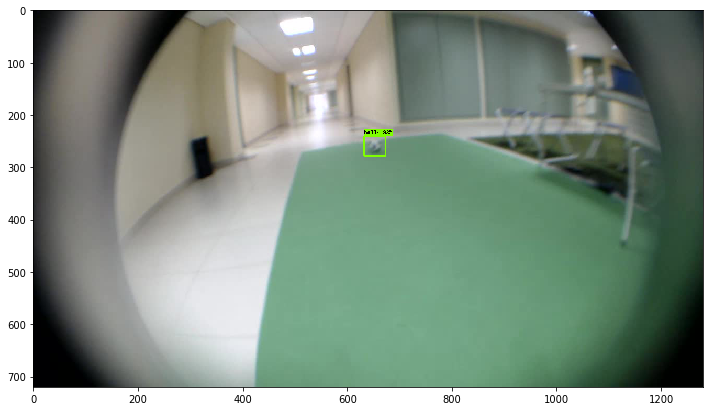

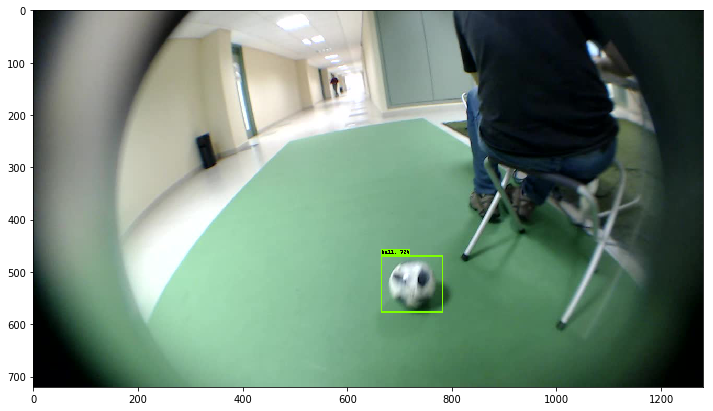

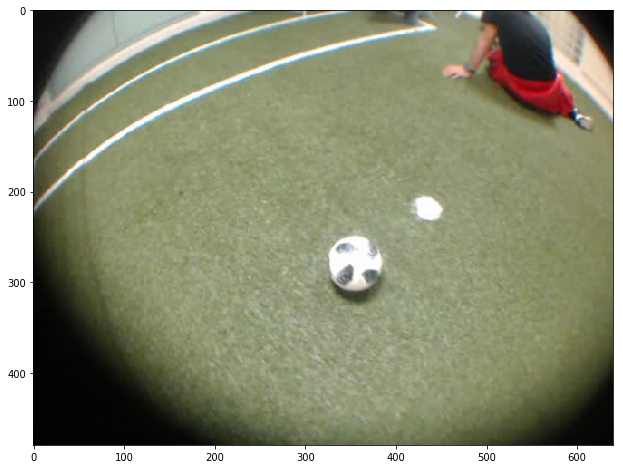

In [0]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops


# This is needed to display the images.
%matplotlib inline


from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile("/content/drive/My Drive/Mestrado_Robo/mobnet_padrao/frozen_inference_graph.pb", 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    import time
    t1 = time.time()
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    print(time.time() - t1)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=3)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)

In [0]:
import time


def run_inference_benchmark(image, graph, trial=20, gpu=True):
    """Run TensorFlow inference benchmark.

    Arguments:
        image {np.array} -- Input image as an Numpy array.
        graph {tf.Graph} -- TensorFlow graph object.

    Keyword Arguments:
        trial {int} -- Number of inference to run for averaging. (default: {20})
        gpu {bool} -- Use Nvidia GPU when available. (default: {True})

    Returns:
        int -- Frame per seconds benchmark result.
    """

    with graph.as_default():
        if gpu:
            config = tf.ConfigProto()
        else:
            config = tf.ConfigProto(device_count={"GPU": 0})
        with tf.Session(config=config) as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                "num_detections",
                "detection_boxes",
                "detection_scores",
                "detection_classes",
                "detection_masks",
            ]:
                tensor_name = key + ":0"
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name
                    )
            if "detection_masks" in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict["detection_boxes"], [0])
                detection_masks = tf.squeeze(tensor_dict["detection_masks"], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict["num_detections"][0], tf.int32
                )
                detection_boxes = tf.slice(
                    detection_boxes, [0, 0], [real_num_detection, -1]
                )
                detection_masks = tf.slice(
                    detection_masks, [0, 0, 0], [real_num_detection, -1, -1]
                )
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1]
                )
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8
                )
                # Follow the convention by adding back the batch dimension
                tensor_dict["detection_masks"] = tf.expand_dims(
                    detection_masks_reframed, 0
                )
            image_tensor = tf.get_default_graph().get_tensor_by_name(
                "image_tensor:0"
            )

            # Run inference
            times = []
            # Kick start the first inference which takes longer and followings.
            output_dict = sess.run(
                tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)}
            )
            for i in range(trial):
                start_time = time.time()
                output_dict = sess.run(
                    tensor_dict, feed_dict={image_tensor: np.expand_dims(image, 0)}
                )
                delta = time.time() - start_time
                times.append(delta)
            mean_delta = np.array(times).mean()
            fps = 1 / mean_delta
            print("average(sec):{:.3f},fps:{:.2f}".format(mean_delta, fps))

    return fps

image = Image.open(TEST_IMAGE_PATHS[-1])
# the array based representation of the image will be used later in order to prepare the
# result image with boxes and labels on it.
image_np = load_image_into_numpy_array(image)
# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)
# Actual detection benchmark.
fps = run_inference_benchmark(image_np, detection_graph, trial=30, gpu=False)

average(sec):0.100,fps:9.95
